<a href="https://colab.research.google.com/github/Grace-Gitome/WiDs-Dathathon-2023/blob/main/ai_for_climate_change_wids_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.8.10


In [ ]:
import numpy as np
import pandas as pd 




/kaggle/input/widsdatathon2023/train_data.csv
/kaggle/input/widsdatathon2023/test_data.csv
/kaggle/input/widsdatathon2023/sample_solution.csv


In [ ]:

x = [1, 2, 3, 4, 5]
print(x[-1:-6:-1])

[5, 4, 3, 2, 1]


In [ ]:
#importing the train dataset
training=pd.read_csv('/content/train_data.csv')
training.head(4)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74


In [ ]:
#importing the test dataset
testing=pd.read_csv('/content/test_data.csv', error_bad_lines=False)
testing.head(4)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.0,0.833333,11/1/22,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.0,0.833333,11/2/22,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.0,0.833333,11/3/22,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.0,0.833333,11/4/22,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69


In [ ]:
print(f'Train data set contains: {training.shape[0]} rows and {training.shape[1]} columns')
print(f'Test data set contains: {testing.shape[0]} rows and {testing.shape[1]} columns') 

Train data set contains: 375734 rows and 246 columns
Test data set contains: 31354 rows and 245 columns


In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [ ]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31354 entries, 0 to 31353
Columns: 245 entries, index to wind-vwnd-925-2010-20
dtypes: float64(241), int64(2), object(2)
memory usage: 58.6+ MB


In [ ]:
#checking for null values
rating_missing=training.isnull().sum()[training.isnull().sum()>0]
print(rating_missing)

nmme0-tmp2m-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
nmme-prate-34w__ccsm3       8738
nmme0-prate-56w__ccsm30    15934
nmme0-prate-34w__ccsm30    15934
nmme-prate-56w__ccsm3      10280
nmme-tmp2m-34w__ccsm3       8738
ccsm30                     15934
dtype: int64


In [ ]:
train_len = len(training)
print(train_len)

375734


In [ ]:
#checking the % of the missing values

perc_missing = ((rating_missing/train_len)*100)
print(perc_missing)

nmme0-tmp2m-34w__ccsm30    4.240766
nmme-tmp2m-56w__ccsm3      2.735978
nmme-prate-34w__ccsm3      2.325581
nmme0-prate-56w__ccsm30    4.240766
nmme0-prate-34w__ccsm30    4.240766
nmme-prate-56w__ccsm3      2.735978
nmme-tmp2m-34w__ccsm3      2.325581
ccsm30                     4.240766
dtype: float64


We can drop the missing values since they only range from 2%-4% from the total dataset 

In [ ]:
#checking for null values
testing.isnull().sum()[testing.isnull().sum()>0]

Series([], dtype: int64)

In [ ]:
#dropping the missing values
training.dropna(inplace=True)

In [ ]:
#checking if there are any missing values
training.isnull().sum()[training.isnull().sum()>0]

Series([], dtype: int64)

In [ ]:
# dropping the index column
training=training.drop(['index'],axis=1)
training.head()

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [ ]:
# dropping the index column
testing=testing.drop(['index'],axis=1)
testing.head()

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0.0,0.833333,11/1/22,339.88,30.88,30.92,29.17,31.02,29.47,30.93,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,0.0,0.833333,11/2/22,334.63,30.88,30.92,29.17,31.02,29.47,30.93,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,0.0,0.833333,11/3/22,337.83,30.88,30.92,29.17,31.02,29.47,30.93,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,0.0,0.833333,11/4/22,345.81,30.88,30.92,29.17,31.02,29.47,30.93,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,0.0,0.833333,11/5/22,357.39,30.88,30.92,29.17,31.02,29.47,30.93,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


In [ ]:
#converting the startdate column to datetime datatype
training.startdate=pd.to_datetime(training.startdate, infer_datetime_format=True)
training.info()
training.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352604 entries, 0 to 375733
Columns: 245 entries, lat to wind-vwnd-925-2010-20
dtypes: datetime64[ns](1), float64(240), int64(3), object(1)
memory usage: 661.8+ MB


,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0.0,0.833333,2014-09-01,237.0,29.02,31.64,29.57,30.73,29.71,31.52,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,0.0,0.833333,2014-09-02,228.9,29.02,31.64,29.57,30.73,29.71,31.52,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42


In [ ]:
#converting the startdate column to datetime datatype
testing.startdate=pd.to_datetime(testing.startdate, infer_datetime_format=True)
testing.info()
testing.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31354 entries, 0 to 31353
Columns: 244 entries, lat to wind-vwnd-925-2010-20
dtypes: datetime64[ns](1), float64(241), int64(1), object(1)
memory usage: 58.4+ MB


,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0.0,0.833333,2022-11-01,339.88,30.88,30.92,29.17,31.02,29.47,30.93,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,0.0,0.833333,2022-11-02,334.63,30.88,30.92,29.17,31.02,29.47,30.93,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16


## EDA

In [ ]:
training.groupby('startdate')['climateregions__climateregion'].count()

startdate
2014-09-01    514
2014-09-02    514
2014-09-03    514
2014-09-04    514
2014-09-05    514
             ... 
2016-08-27    514
2016-08-28    514
2016-08-29    514
2016-08-30    514
2016-08-31    514
Name: climateregions__climateregion, Length: 686, dtype: int64

In [ ]:
# merge the train and test data
climate_df = pd.concat([training, testing], axis=0)

# Create new column with a combination of both lat and longitude
climate_df['location_group'] = climate_df.groupby(['lat','lon']).ngroup()

print(f'{climate_df.location_group.nunique()} unique locations')

# Split back up
training = climate_df.iloc[:len(training)]
testing = climate_df.iloc[len(training):]

575 unique locations


Based on merging the longitude & latitude to (location_group), there are 575 unique locations

In [ ]:
training.describe()

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,location_group
count,352604.000000,352604.000000,352604.000000,352604.000000,352604.00000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,...,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000
mean,0.592766,0.517964,268.756935,10.008439,11.94841,9.914150,10.913216,10.131531,11.051802,10.984060,...,-7.337988,4.057347,19.243644,-18.129475,-11.662332,-6.269694,14.722638,12.285321,12.662362,300.330739
std,0.251744,0.272059,200.025342,10.741907,10.88407,10.336138,10.429579,9.321961,10.529236,10.539843,...,35.982786,36.453583,25.719270,32.513595,33.707956,27.444561,24.547827,24.244970,24.503133,164.887235
min,0.000000,0.000000,-2.310000,-14.960000,-14.97000,-11.720000,-17.560000,-13.720000,-13.330000,-13.520000,...,-89.940000,-64.870000,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-54.580000,0.000000
25%,0.409091,0.300000,95.620000,1.000000,3.06000,1.480000,2.560000,2.890000,2.480000,2.410000,...,-31.800000,-20.220000,1.650000,-40.690000,-33.410000,-20.770000,-0.980000,-2.360000,-4.580000,175.000000
50%,0.590909,0.533333,234.570000,8.860000,10.93000,9.150000,10.670000,9.990000,10.320000,10.310000,...,-8.850000,0.135000,19.785000,-17.830000,-9.660000,-6.260000,18.490000,13.045000,12.675000,308.500000
75%,0.818182,0.766667,412.950000,19.010000,20.91000,18.580000,19.410000,17.570000,19.150000,19.040000,...,18.230000,24.470000,36.090000,4.390000,9.280000,11.800000,30.370000,31.040000,30.240000,441.000000
max,1.000000,1.000000,1185.140000,36.080000,36.03000,33.390000,34.310000,35.750000,38.350000,38.450000,...,96.550000,105.160000,91.760000,56.550000,83.890000,64.850000,77.960000,76.890000,88.660000,574.000000


In [ ]:
testing.describe()

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,location_group
count,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,...,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000
mean,0.592766,0.517964,299.244395,19.363234,21.195801,19.204389,20.140415,18.261659,20.396613,20.293250,...,-34.379016,25.485902,36.913279,-21.290328,10.448689,-12.676885,8.211967,-11.478033,21.083770,302.317121
std,0.251748,0.272063,117.029504,7.310349,7.151861,7.146665,6.169318,5.539982,7.087798,6.919063,...,24.479350,30.720523,17.083142,22.336810,8.557387,29.438632,29.897845,18.660838,16.841297,162.559492
min,0.000000,0.000000,32.820000,1.550000,2.900000,1.170000,3.530000,1.840000,0.080000,0.510000,...,-76.450000,-29.250000,6.500000,-59.540000,-5.450000,-66.770000,-32.150000,-53.690000,-16.560000,0.000000
25%,0.409091,0.300000,215.962500,14.060000,16.140000,14.440000,15.840000,14.660000,15.540000,15.490000,...,-56.070000,3.630000,19.570000,-39.340000,4.720000,-30.630000,-18.360000,-23.150000,13.420000,175.000000
50%,0.590909,0.533333,292.915000,19.940000,21.720000,19.325000,20.150000,18.210000,20.340000,20.230000,...,-31.070000,22.740000,37.090000,-21.420000,10.660000,-22.640000,0.150000,-13.950000,21.090000,308.500000
75%,0.818182,0.766667,371.330000,24.610000,26.810000,24.760000,24.890000,22.180000,25.730000,25.320000,...,-15.510000,44.690000,49.660000,-0.790000,17.090000,14.420000,28.840000,-0.470000,32.410000,441.000000
max,1.000000,1.000000,740.170000,36.080000,36.030000,32.970000,33.910000,35.310000,37.420000,37.340000,...,25.330000,79.610000,71.270000,14.150000,29.000000,33.350000,74.130000,28.270000,51.450000,574.000000


In [ ]:
# Installing package
!pip install -q sweetviz

In [ ]:
# Start Sweetviz
import datetime as dt

start_time = dt.datetime.now()
print("Started at ", start_time)

Started at  2023-02-13 18:13:34.387774


In [ ]:
#importing sweetviz and visualizing our data
import sweetviz as sv

# EDA using Sweetviz
sweet_report = sv.analyze(training, pairwise_analysis="off")

# Saving results to HTML file
sweet_report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
print('Sweetviz finished...')
finish_time = dt.datetime.now()
print("Finished at ", finish_time)
elapsed = finish_time - start_time
print("Elapsed time: ", elapsed)

Sweetviz finished...
Finished at  2023-02-13 18:17:15.022075
Elapsed time:  0:03:40.634301


## Pandas Profiling

Pandas profiling is a Python library that provides a fast and easy-to-use interface for generating summary reports of data frames. Its goal is to provide a one-line Exploratory Data Analysis (EDA) experience in a consistent and efficient solution. It can generate a variety of statistics and visualizations for a given dataset, including summary statistics, histograms, missing value statistics, and correlation plots. 

In [ ]:
# Installing package
!pip install pandas-profiling

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.2
    Uninstalling MarkupSafe-2.1.2:
      Successfully uninstalled MarkupSafe-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
werkzeug 2.2.2 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
# Start pandas-profiling
start_time = dt.datetime.now()
print("Started at ", start_time)

Started at  2023-02-13 18:17:27.593331


In [ ]:
# Importing library
from pandas_profiling import ProfileReport

# Defining the library
profile = ProfileReport(training, minimal=True)

# Exporting your report as a html file
profile.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print('pandas-profiling finished...')
finish_time = dt.datetime.now()
print("Finished at ", finish_time)
elapsed = finish_time - start_time
print("Elapsed time: ", elapsed)

pandas-profiling finished...
Finished at  2023-02-13 18:20:22.273866
Elapsed time:  0:02:54.680535


An alternative way to handle really large datasets is to use a portion of it to generate the profiling report. Several users report this is a good way to scale back the computation time while maintaining representativity. coz the larger the dataset the more time it takes profiling

In [ ]:
description = "Disclaimer: this profiling report was generated using a sample of 5% of the original dataset."
sample = training.sample(frac=0.05)

profile = sample.profile_report(dataset={"description": description}, minimal=True)
profile.to_file("output.pdf")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/pandas_profiling/profile_report.py:263: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Using pandas.DatetimeIndex() to extract month and year
training['year'] = pd.DatetimeIndex(training['startdate']).year
training['month'] = pd.DatetimeIndex(training['startdate']).month
training['day'] = pd.DatetimeIndex(training['startdate']).day
print(training.head())

   lat       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0  0.0  0.833333 2014-09-01                              237.00   
1  0.0  0.833333 2014-09-02                              228.90   
2  0.0  0.833333 2014-09-03                              220.69   
3  0.0  0.833333 2014-09-04                              225.28   
4  0.0  0.833333 2014-09-05                              237.24   

   nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                     29.02                     31.64   
1                     29.02                     31.64   
2                     29.02                     31.64   
3                     29.02                     31.64   
4                     29.02                     31.64   

   nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
0                    29.57                    30.73                    29.71   
1                    29.57                    30.73                    29.71   
2             

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
training[["startdate","year", "month", "day"]].describe()

,year,month,day
count,352604.000000,352604.000000,352604.000000
mean,2015.177843,6.361516,15.708455
std,0.708450,3.500181,8.730817
min,2014.000000,1.000000,1.000000
25%,2015.000000,3.000000,8.000000
50%,2015.000000,6.000000,16.000000
75%,2016.000000,10.000000,23.000000
max,2016.000000,12.000000,31.000000


In [ ]:
unique_years = training["year"].unique()
print(unique_years)

[2014 2015 2016]


The data ranges between the year 2014 to 2016

In [ ]:
#Analyzing our target¶
#Initially, checking the summary statistics and distribution of the data may be useful.
training['contest-tmp2m-14d__tmp2m'].describe()

count    352604.000000
mean         11.420598
std           9.945258
min         -20.358963
25%           4.284578
50%          11.529958
75%          19.175051
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

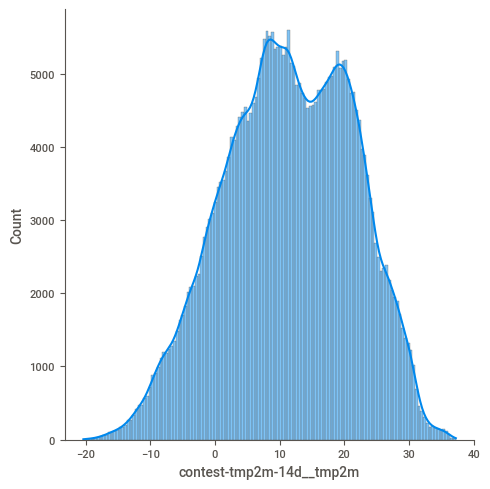

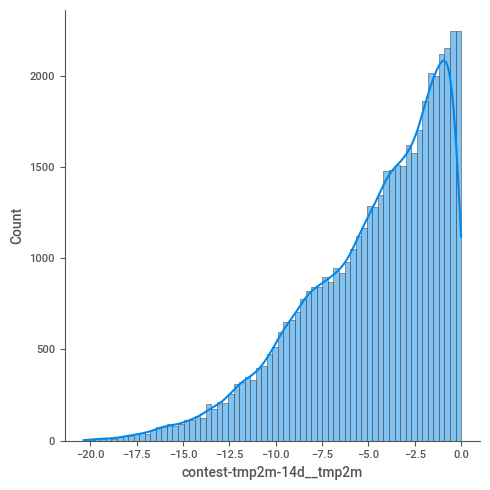

In [ ]:
#visualizing the temparature(target var) range
import seaborn as sns
sns.displot(training['contest-tmp2m-14d__tmp2m'],kde=True)
sns.displot(training[training['contest-tmp2m-14d__tmp2m']<0]['contest-tmp2m-14d__tmp2m'],kde=True)

******visualizing the categorical variables**

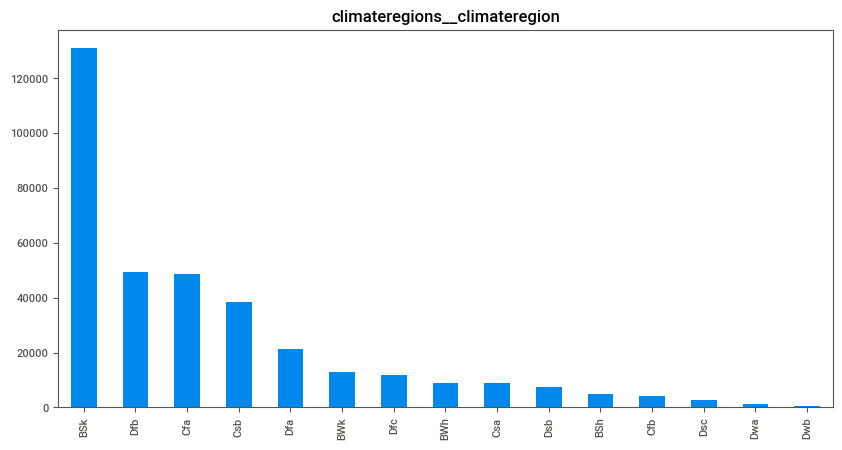

In [ ]:
# Plot bar plots for all categorical columns
import matplotlib.pyplot as plt
for column in training.select_dtypes(include=['object']).columns:
    training[column].value_counts().plot(kind='bar', figsize=(10,5))
    plt.title(column)
    plt.show()

In [ ]:
training.corr()

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,...,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,location_group,year,month,day
lat,1.000000e+00,-3.063293e-01,-0.280975,-0.390847,-0.380519,-0.400337,-0.379537,-0.406475,-0.382396,-0.385830,...,4.915056e-15,6.982886e-16,4.262371e-16,-9.826477e-17,2.511019e-15,2.198470e-15,9.966775e-01,-3.519529e-11,8.955563e-15,-5.224679e-15
lon,-3.063293e-01,1.000000e+00,-0.052246,0.160725,0.211250,0.156880,0.148084,0.110681,0.157470,0.157115,...,-9.571731e-16,-4.248127e-16,-1.295423e-16,-4.094191e-17,-1.927956e-16,-6.319585e-16,-2.573765e-01,8.451331e-12,-3.736313e-15,1.843234e-15
contest-pevpr-sfc-gauss-14d__pevpr,-2.809750e-01,-5.224590e-02,1.000000,0.721021,0.703225,0.721027,0.689894,0.725211,0.701412,0.702516,...,2.980890e-01,1.323450e-01,1.909837e-02,2.637054e-01,-2.703029e-02,-9.815889e-02,-2.926822e-01,2.252694e-01,4.546035e-02,-4.548487e-03
nmme0-tmp2m-34w__cancm30,-3.908474e-01,1.607248e-01,0.721021,1.000000,0.989566,0.984501,0.982356,0.977706,0.970591,0.972078,...,1.836305e-01,3.296480e-01,-4.197327e-02,2.126623e-01,-1.244099e-01,-1.393631e-01,-3.894396e-01,-6.097323e-02,3.799114e-01,4.931724e-03
nmme0-tmp2m-34w__cancm40,-3.805188e-01,2.112496e-01,0.703225,0.989566,1.000000,0.974219,0.982520,0.973101,0.969782,0.970230,...,1.799712e-01,3.206224e-01,-3.739443e-02,2.167804e-01,-1.229411e-01,-1.457791e-01,-3.760582e-01,-5.568544e-02,3.716931e-01,5.731248e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wind-vwnd-925-2010-20,2.198470e-15,-6.319585e-16,-0.098159,-0.139363,-0.145779,-0.105100,-0.119298,-0.099504,-0.137962,-0.139011,...,-3.772667e-02,-5.817948e-03,8.160914e-02,-2.566069e-01,-1.365565e-01,1.000000e+00,2.235324e-15,-1.665891e-03,1.552586e-01,-2.166931e-02
location_group,9.966775e-01,-2.573765e-01,-0.292682,-0.389440,-0.376058,-0.399454,-0.378516,-0.407919,-0.381045,-0.384592,...,4.955397e-15,7.326588e-16,4.530295e-16,-1.046916e-16,2.440076e-15,2.235324e-15,1.000000e+00,-3.516365e-11,8.908847e-15,-5.347267e-15
year,-3.519529e-11,8.451331e-12,0.225269,-0.060973,-0.055685,-0.043291,-0.088223,-0.046821,-0.055519,-0.051025,...,6.365909e-02,-3.689934e-01,2.910440e-01,2.020765e-01,1.646746e-01,-1.665891e-03,-3.516365e-11,1.000000e+00,-5.620606e-01,1.548033e-03
month,8.955563e-15,-3.736313e-15,0.045460,0.379911,0.371693,0.363053,0.411524,0.378781,0.365202,0.367249,...,-8.584886e-02,4.330401e-01,-1.811939e-01,-4.585582e-03,-1.169049e-01,1.552586e-01,8.908847e-15,-5.620606e-01,1.000000e+00,1.542204e-02


In [ ]:
!pip install lightwood

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 391.0 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 15.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from lightwood.api.high_level import (
    ProblemDefinition,
    json_ai_from_problem,
    code_from_json_ai,
    predictor_from_code,
)



In [ ]:
# Define the prediction task by naming the target column
pdef = ProblemDefinition.from_dict(
    {
        "target": "contest-tmp2m-14d__tmp2m",  # column you want to predict
    }
)



In [ ]:
# Generate JSON-AI code to model the problem
json_ai = json_ai_from_problem(training, problem_definition=pdef)




In [ ]:
# OPTIONAL - see the JSON-AI syntax
#print(json_ai.to_json())

# Generate python code
code = code_from_json_ai(json_ai)

# OPTIONAL - see generated code
#print(code)


In [ ]:
# Create a predictor from python code
predictor = predictor_from_code(code)

# Train a model end-to-end from raw data to a finalized predictor
predictor.learn(training)

# Make the train/test splits and show predictions for a few examples
#test_df = predictor.split(predictor.preprocess(df))["test"]
preds = predictor.predict(testing).iloc[:10]
print(preds)

[18:52:06] WARNING: ../src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1055.)
